In [292]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [293]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [294]:
from urllib.request import urlretrieve
urlretrieve(URL,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x17aa9d2c588>)

In [321]:
!tree Fremont.csv
import os

os.

Folder PATH listing for volume OSDisk
Volume serial number is EE47-F65D
C:\USERS\I343785\GOOGLE DRIVE\CODE\PYTHON\JUPYTERWORKFLOW\FREMONT.CSV
Invalid path - \USERS\I343785\GOOGLE DRIVE\CODE\PYTHON\JUPYTERWORKFLOW\FREMONT.CSV
No subfolders exist 



In [296]:
import pandas as pd

In [297]:
df=pd.read_csv('Fremont.csv',parse_dates=True,index_col='Date')
df.columns=['East','West']
df.head()
df.shape

,East,West
Date,,
2019-06-30 23:00:00,7.0,15.0
2019-06-30 22:00:00,20.0,30.0
2019-06-30 21:00:00,31.0,32.0
2019-06-30 20:00:00,72.0,58.0
2019-06-30 19:00:00,58.0,77.0


(59088, 2)

In [298]:
df['Total']=df.East+df.West
df.head()

,East,West,Total
Date,,,
2019-06-30 23:00:00,7.0,15.0,22.0
2019-06-30 22:00:00,20.0,30.0,50.0
2019-06-30 21:00:00,31.0,32.0,63.0
2019-06-30 20:00:00,72.0,58.0,130.0
2019-06-30 19:00:00,58.0,77.0,135.0


In [299]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

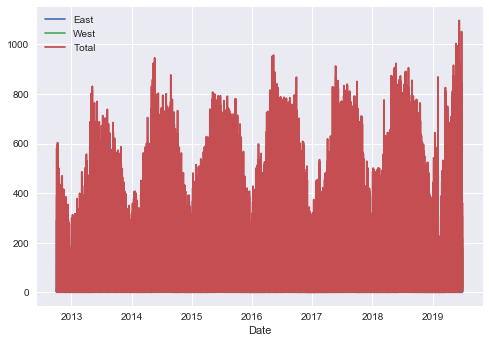

In [300]:
df.plot()

(0, 1120774.6)

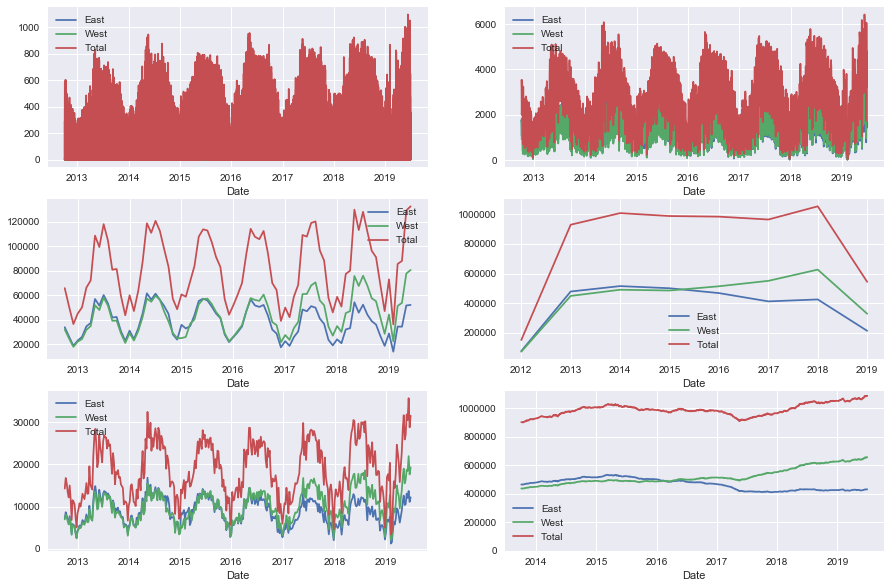

In [301]:
figsize=(15,10)
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=figsize)
df.plot(ax=axes[0,0])
df.resample('D').sum().plot(ax=axes[0,1])
df.resample('M').sum().plot(ax=axes[1,0])
df.resample('Y').sum().plot(ax=axes[1,1])
df.resample('W').sum().plot(ax=axes[2,0])
ax_21=df.resample('D').sum().rolling(365).sum().plot(ax=axes[2,1])
ax_21.set_ylim(0,None)#ax_21[0]

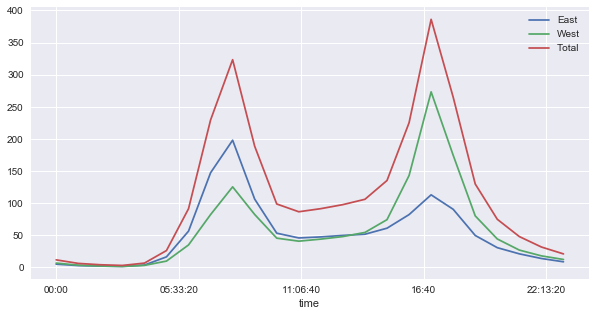

In [302]:
df.groupby(df.index.time).mean().plot(figsize=(10,5))

In [303]:
pivoted=df.pivot_table('Total',index=df.index.time, columns=df.index.date)
pivoted.head()
# pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2019-06-21,2019-06-22,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,10.0,39.0,45.0,7.0,9.0,13.0,15.0,15.0,28.0,27.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,12.0,22.0,14.0,2.0,0.0,8.0,5.0,6.0,11.0,21.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,5.0,2.0,5.0,6.0,3.0,2.0,4.0,1.0,3.0,15.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,2.0,3.0,2.0,0.0,4.0,5.0,3.0,3.0,5.0,2.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,7.0,15.0,5.0,6.0,9.0,10.0,6.0,8.0,1.0,3.0


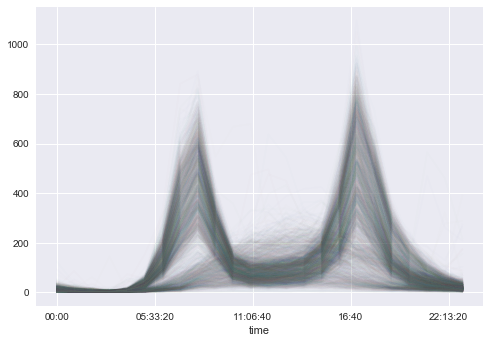

In [304]:
pivoted.plot(legend=False,alpha=0.01)

In [320]:
pivoted2=pivoted.reset_index()
# pivoted2.head()
# type(pivoted2.index[0])
melted=pd.melt(pivoted2,id_vars=['index'],value_vars=pivoted2.columns[1:],var_name='date',value_name='Total')
# melted.head()
# melted.shape
melted.rename(columns={'index':'time'},inplace=True)
# # melted['date']=melted[['date','time']].astype('str').values.tolist()
# melted['date']=pd.Series(melted[['date','time']].astype('str').values.tolist()).apply(' '.join)
melted.date=melted['date'].astype('str')
melted.time=melted['time'].astype('str')

melted.date=pd.to_datetime(melted.date + ' ' + melted.time)
melted.drop(['time'],axis=1,inplace=True)
# melted.date=pd.to_datetime(melted.date.apply(' '.join))
melted.set_index('date',inplace=True)
melted.head()

,Total
date,
2012-10-03 00:00:00,13.0
2012-10-03 01:00:00,10.0
2012-10-03 02:00:00,2.0
2012-10-03 03:00:00,5.0
2012-10-03 04:00:00,7.0
